In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from matplotlib.ticker import FuncFormatter


In [60]:
plt.style.use('seaborn')

In [61]:
animes = pd.read_csv('anime_cleaned.csv')
animes = animes.rename(columns={'genre': 'genres', 'studio': 'studios'})
animes = animes.iloc[0:10]
animes = animes.set_index('anime_id')


In [62]:
animes[['title', 'genres']]

,title,genres
anime_id,,
11013,Inu x Boku SS,"Comedy, Supernatural, Romance, Shounen"
2104,Seto no Hanayome,"Comedy, Parody, Romance, School, Shounen"
5262,Shugo Chara!! Doki,"Comedy, Magic, School, Shoujo"
721,Princess Tutu,"Comedy, Drama, Magic, Romance, Fantasy"
12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen"
6586,Yume-iro Pâtissière,"Kids, School, Shoujo"
178,Ultra Maniac,"Magic, Comedy, Romance, School, Shoujo"
2787,Shakugan no Shana II (Second),"Action, Drama, Fantasy, Romance, School, Super..."
4477,Nodame Cantabile: Paris-hen,"Music, Slice of Life, Comedy, Romance, Josei"


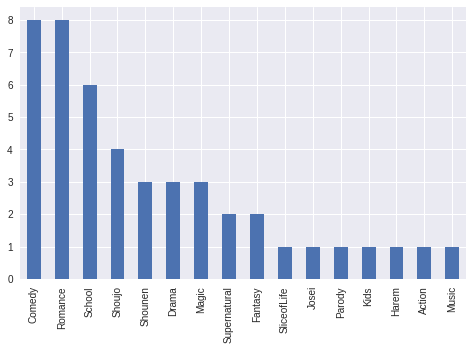

In [63]:
genres = animes['genres'].apply(lambda x: x.replace(' ', '').split(','))
genres = pd.Series([y for x in genres for y in x if y != '']).value_counts()
genres.plot(kind='bar', figsize=(8, 5))

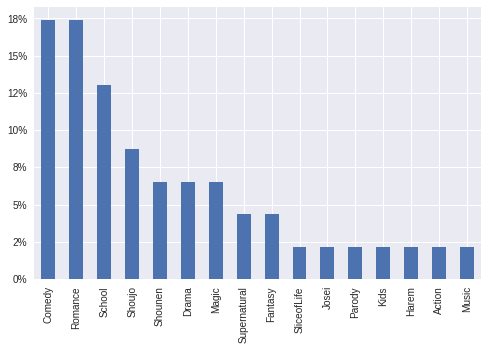

In [64]:
(genres / genres.sum()).plot(kind='bar', figsize=(8, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  

In [65]:
genres_list = animes['genres'].apply(lambda x: x.replace(' ', ''))
# can not use reverse isin, must use str.contains
genres_occurence = pd.Series({genre: genres_list.str.contains(genre).sum() for genre in genres.index})

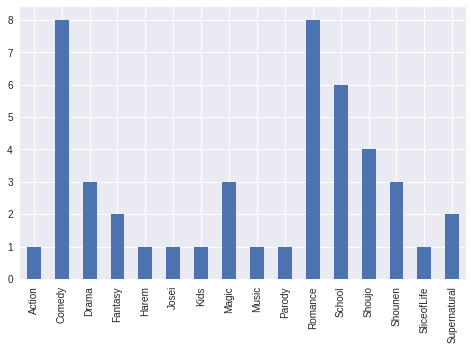

In [66]:
genres_occurence.plot(kind='bar', figsize=(8, 5))

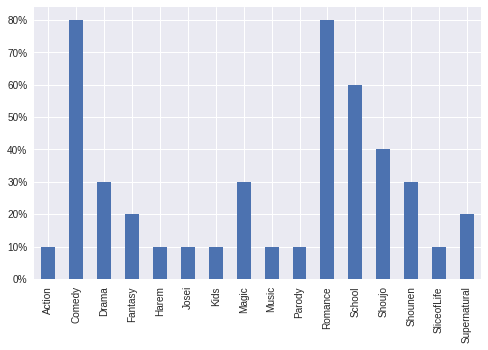

In [67]:
(genres_occurence / animes.shape[0]).plot(kind='bar', figsize=(8, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [68]:
genres_arr = animes['genres'].apply(lambda x: x.replace(' ', '').split(',')).apply(pd.Series).stack().to_frame(name='genre')
genres_arr.index.levels[0].name = 'anime_id'
animes_genres = pd.merge(animes, genres_arr, how='inner', left_index=True, right_index=True)
animes_genres = animes_genres[animes_genres['genre'] != '']

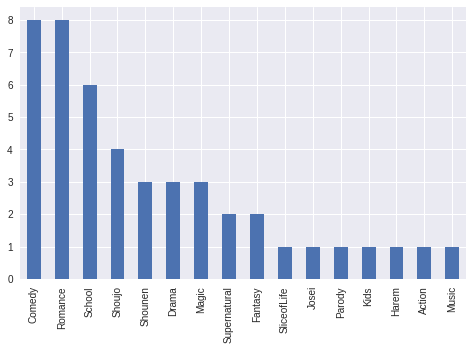

In [70]:
animes_genres['genre'].value_counts().plot(kind='bar', figsize=(8, 5))

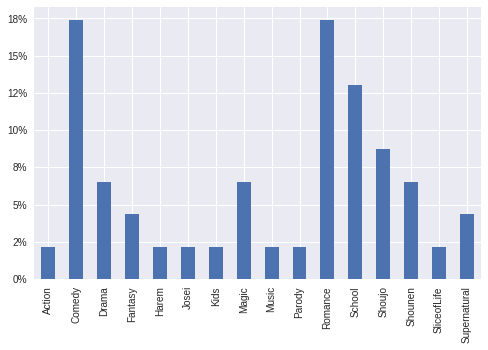

In [85]:
(animes_genres['genre'].value_counts() / animes_genres['genre'].size).sort_index().plot(kind='bar', figsize=(8, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

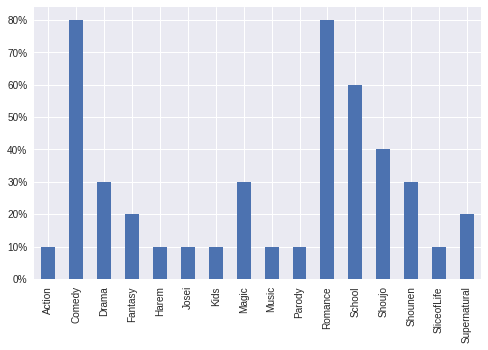

In [83]:
(animes_genres['genre'].value_counts() / animes_genres.index.levels[0].size).sort_index().plot(kind='bar', figsize=(8, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  

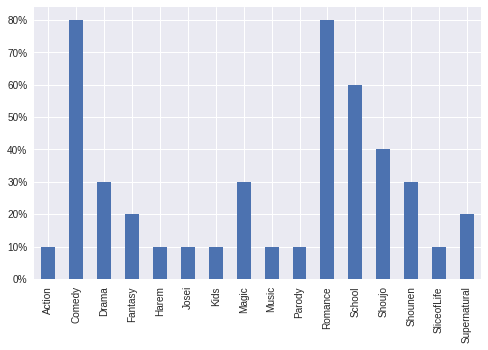

In [84]:
(genres_occurence / animes.shape[0]).plot(kind='bar', figsize=(8, 5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))